In [1]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,rcParams
import itertools

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [3]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
# Veri setindeki değişken ve gözlem sayısı
print("Gözlem sayısı : " ,len(data))
print("Değişken sayısı : ", len(data.columns))

Gözlem sayısı :  13611
Değişken sayısı :  17


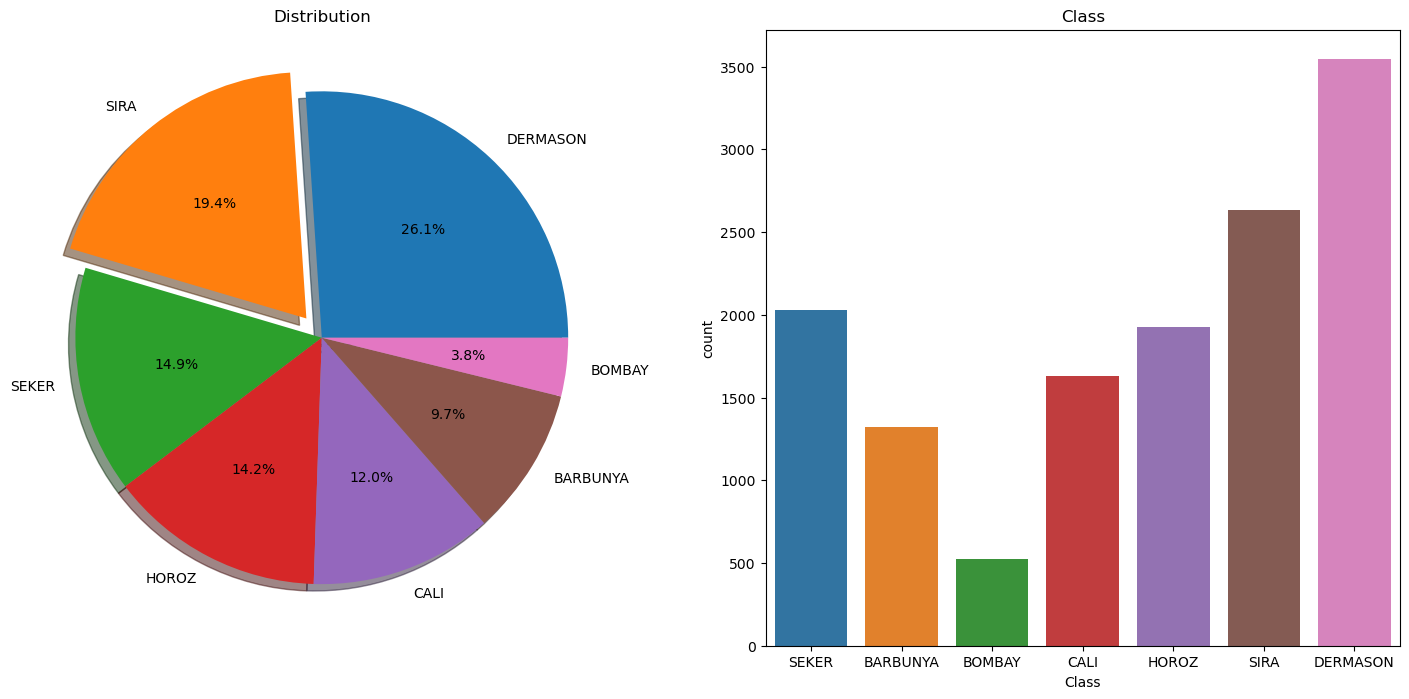

In [5]:

# Create a figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Calculate the class value counts
class_counts = data['Class'].value_counts()

# Set explode list based on the number of unique classes
explode = [0.1 if i == 1 else 0 for i in range(len(class_counts))]

# Plot the pie chart
class_counts.plot.pie(explode=explode, autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Distribution')
ax[0].set_ylabel('')

# Plot the count plot
sns.countplot('Class', data=data, ax=ax[1])
ax[1].set_title('Class')

plt.show()

In [6]:
rob_scaler = RobustScaler()
data['ShapeFactor4'] = rob_scaler.fit_transform(data['ShapeFactor4'].values.reshape(-1,1))
data['Area'] = rob_scaler.fit_transform(data['Area'].values.reshape(-1,1))
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.650176,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.559366,SEKER
1,-0.636618,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.489131,SEKER
2,-0.610782,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.641250,SEKER
3,-0.585666,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,-0.523271,SEKER
4,-0.580387,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.665157,SEKER


In [7]:
# Hold out yöntemi uygulayıp veri setini eğitim ve test olarak ikiye ayırıyoruz.(%70,%30)
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123456)

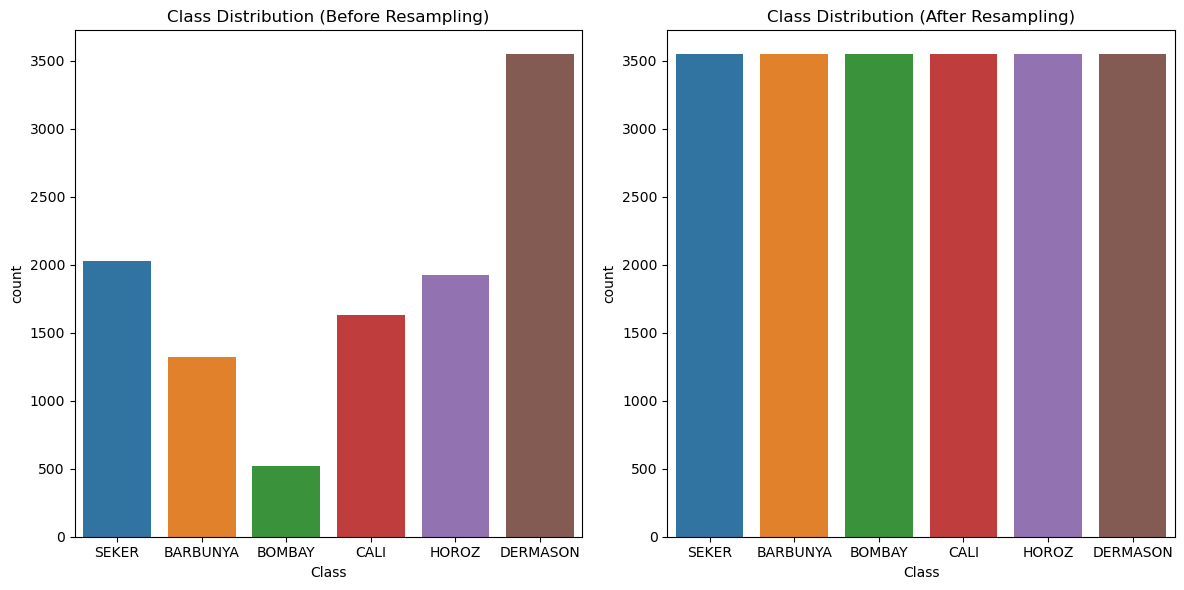

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


# Select the classes for resampling
selected_classes = ['DERMASON', 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ']

# Filter the dataset for selected classes
filtered_data= data[data['Class'].isin(selected_classes)]

# Separate features (X) and target variable (y)
X = filtered_data.drop('Class', axis=1)
y = filtered_data['Class']

# Perform resampling for selected classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Create a new DataFrame for the resampled data
resampled_data= pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Class'] = y_resampled

# Plot the class distribution before and after resampling
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Before resampling
sns.countplot(x='Class', data=filtered_data, ax=ax[0])
ax[0].set_title('Class Distribution (Before Resampling)')

# After resampling
sns.countplot(x='Class', data=resampled_data, ax=ax[1])
ax[1].set_title('Class Distribution (After Resampling)')

plt.tight_layout()
plt.show()

In [9]:
print(resampled_data)

           Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0     -0.650176    610.291       208.178117       173.888747      1.197191   
1     -0.636618    638.018       200.524796       182.734419      1.097356   
2     -0.610782    624.110       212.826130       175.931143      1.209713   
3     -0.585666    645.884       210.557999       182.516516      1.153638   
4     -0.580387    620.134       201.847882       190.279279      1.060798   
...         ...        ...              ...              ...           ...   
21271 -0.242281    708.534       246.144096       199.841693      1.231695   
21272 -0.358823    686.068       230.909791       197.036223      1.171915   
21273 -0.159015    734.559       258.726155       200.442393      1.290776   
21274 -0.336266    701.396       237.532308       194.531879      1.221046   
21275  0.035114    769.815       267.058152       217.385504      1.228500   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solid

# Naive Bayes Classification

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create a new DataFrame for the resampled data
resampled_data= pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Class'] = y_resampled
 
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)



Naive Bayes Accuracy: 0.8250835104767689
Precision: 0.8280386700849931
Recall: 0.8274315260175215
F-score: 0.8259613749977853
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.69      0.57      0.62       388
      BOMBAY       1.00      1.00      1.00       153
        CALI       0.72      0.80      0.76       508
    DERMASON       0.91      0.86      0.88      1043
       HOROZ       0.87      0.88      0.88       575
       SEKER       0.77      0.86      0.81       626

    accuracy                           0.83      3293
   macro avg       0.83      0.83      0.83      3293
weighted avg       0.83      0.83      0.82      3293



Naive Bayes Accuracy: 0.8250835104767689
Precision: 0.8280386700849931
Recall: 0.8274315260175215
F-score: 0.8259613749977853
Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.69      0.57      0.62       388
      BOMBAY       1.00      1.00      1.00       153
        CALI       0.72      0.80      0.76       508
    DERMASON       0.91      0.86      0.88      1043
       HOROZ       0.87      0.88      0.88       575
       SEKER       0.77      0.86      0.81       626

    accuracy                           0.83      3293
   macro avg       0.83      0.83      0.83      3293
weighted avg       0.83      0.83      0.82      3293



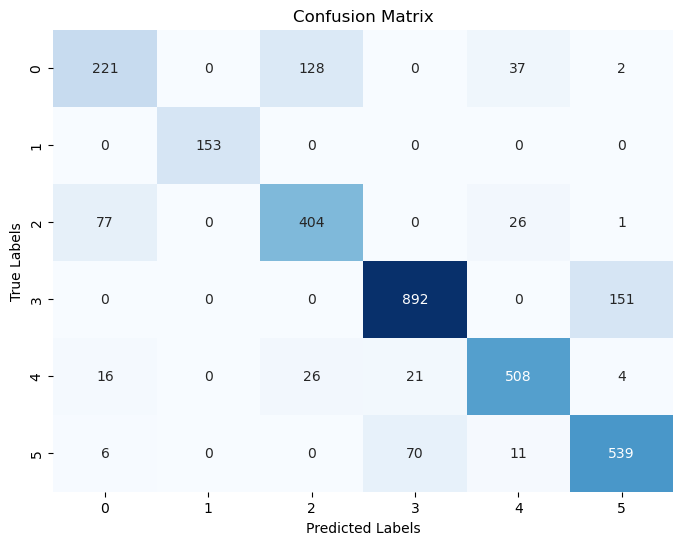

In [11]:
# Calculate precision, recall, and F-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')

print("Naive Bayes Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# DECISION TREE CLASSIFICATION


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [13]:
# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [15]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Decision Tree Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Decision Tree Classifier Accuracy: 0.9398724567263893
Precision: 0.9397533178963541
Recall: 0.9394431892615637
F-score: 0.9394377293249642


In [16]:

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.87      0.91      0.89       388
      BOMBAY       1.00      0.99      1.00       153
        CALI       0.91      0.88      0.89       508
    DERMASON       0.96      0.97      0.97      1043
       HOROZ       0.94      0.95      0.95       575
       SEKER       0.95      0.93      0.94       626

    accuracy                           0.94      3293
   macro avg       0.94      0.94      0.94      3293
weighted avg       0.94      0.94      0.94      3293



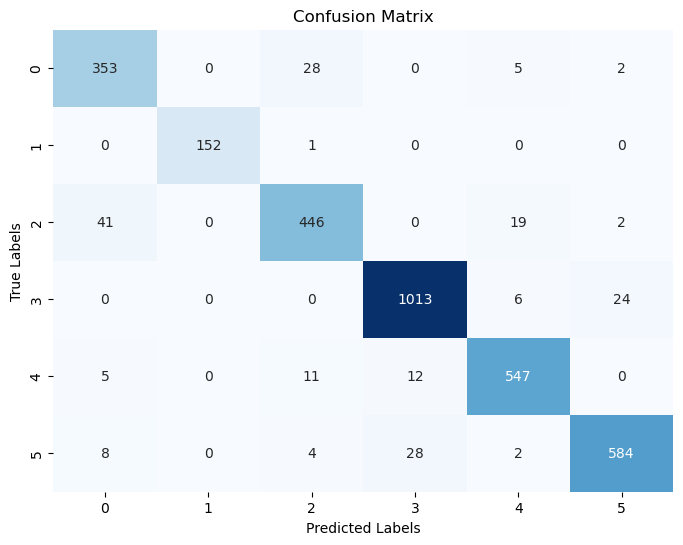

In [17]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# SUPPORT VECTOR MACHINE CLASSIFICATION 

In [18]:
from sklearn.svm import SVC

In [19]:
# Create an SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

SVC()

In [20]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [21]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Support Vector Machine Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Support Vector Machine Classifier Accuracy: 0.6954145156392347
Precision: 0.6761455149692298
Recall: 0.6822574250909662
F-score: 0.660839403003425


In [22]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("SCV Confusion Matrix:")
print(cm)

SCV Confusion Matrix:
[[ 34   0 250   0 101   3]
 [  1 152   0   0   0   0]
 [ 34   0 426   0  47   1]
 [  0   0   0 890   0 153]
 [ 22   0  22  14 436  81]
 [  0   0   0 223  51 352]]


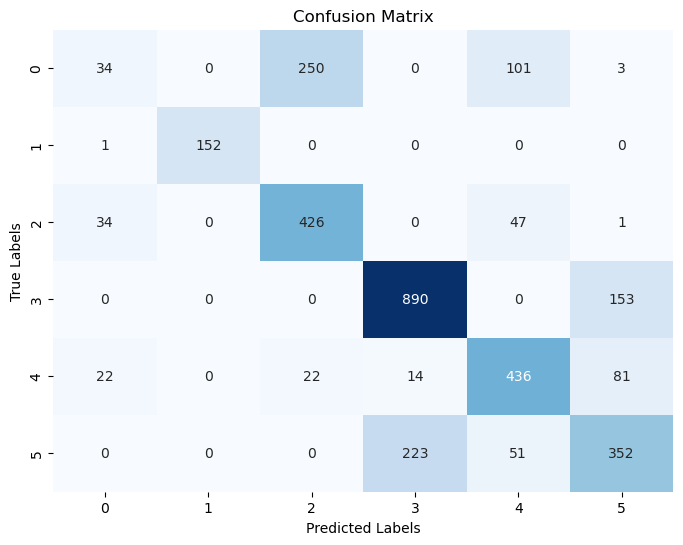

In [23]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# RANDOM FOREST CLASSIFICATION

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Create a Random Forest classifier with 100 trees
classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [27]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Random Forest Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Random Forest Classifier Accuracy: 0.9608259945338598
Precision: 0.9605221269673926
Recall: 0.9592696521148953
F-score: 0.9598436862249103


In [28]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 363    0   19    0    3    3]
 [   1  152    0    0    0    0]
 [  24    0  468    0   15    1]
 [   0    0    0 1029    2   12]
 [   1    0   11    9  554    0]
 [   8    0    2   17    1  598]]


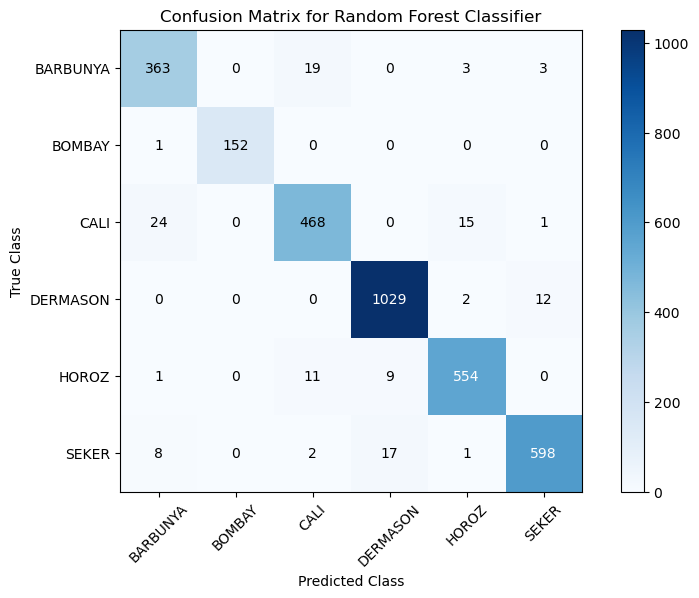

In [29]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# K-NEAREST NEIGHBOOR CLASSIFICATION

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Create a KNN classifier with k=10
classifier = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [33]:
# Calculate  accuracy, precision, recall, and F-score 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')

print("KNN Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

KNN Accuracy: 0.7983601579107197
Precision: 0.7878293249310914
Recall: 0.775134384904049
F-score: 0.7769421548035685


In [34]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 140    0  173    0   73    2]
 [   0  152    1    0    0    0]
 [  92    0  374    0   41    1]
 [   0    0    0 1006    0   37]
 [  23    0   21   39  473   19]
 [   5    0    0  107   30  484]]


<function matplotlib.pyplot.show(close=None, block=None)>

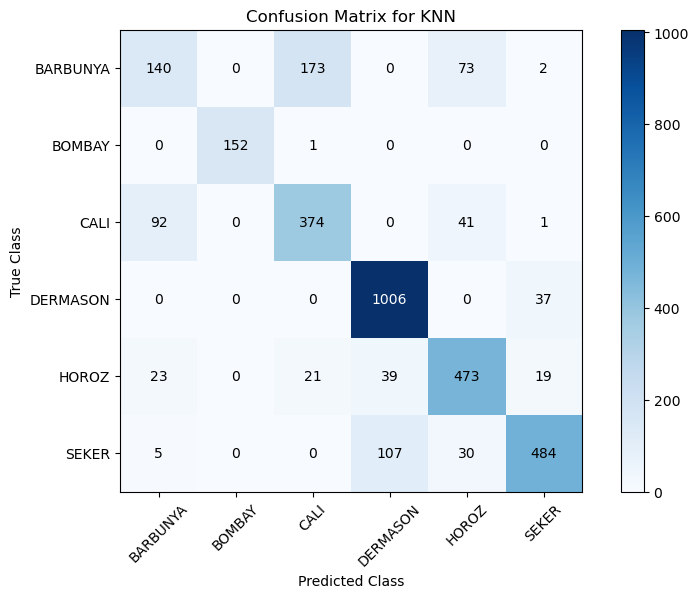

In [35]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show

# TABLO 2

In [37]:
#tablo oluşturmak için gerekli kütüphane
import pandas as pd

# Results of classification methods
results = {
    'Method': ['Naive Bayes','Decision Tree','Support Vector Machine','Random Forest','K-Nearest Neighbors'],
    'Accuracy': [0.8250835104767689,0.9398724567263893,0.6954145156392347,0.9608259945338598,0.7983601579107197],
    'Precision': [0.8280386700849931,0.9397533178963541,0.6761455149692298,0.9605221269673926,0.7878293249310914],
    'Recall': [0.8274315260175215,0.9394431892615637,0.6822574250909662,0.9592696521148953,0.775134384904049],
    'F-score': [0.8259613749977853,0.9394377293249642,0.660839403003425,0.9598436862249103,0.7769421548035685]
}

# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the results table
print(df_results)



                   Method  Accuracy  Precision    Recall   F-score
0             Naive Bayes  0.825084   0.828039  0.827432  0.825961
1           Decision Tree  0.939872   0.939753  0.939443  0.939438
2  Support Vector Machine  0.695415   0.676146  0.682257  0.660839
3           Random Forest  0.960826   0.960522  0.959270  0.959844
4     K-Nearest Neighbors  0.798360   0.787829  0.775134  0.776942


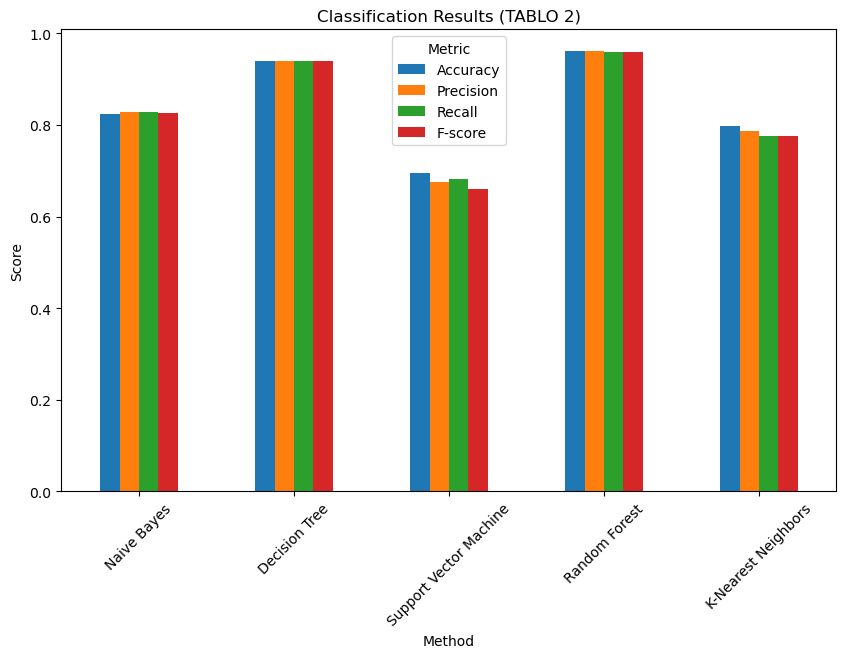

In [38]:
# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Set the Method column as the index
df_results.set_index('Method', inplace=True)

# Plotting the results
df_results.plot(kind='bar', rot=45, figsize=(10, 6))
plt.xlabel('Method')
plt.ylabel('Score')
plt.title('Classification Results (TABLO 2)')
plt.legend(title='Metric')
plt.show()

In [39]:
from tabulate import tabulate

# Convert DataFrame to tabular format
table = tabulate(df_results, headers='keys', tablefmt='fancy_grid')

# Display the tabular results
print(table)

╒════════════════════════╤════════════╤═════════════╤══════════╤═══════════╕
│ Method                 │   Accuracy │   Precision │   Recall │   F-score │
╞════════════════════════╪════════════╪═════════════╪══════════╪═══════════╡
│ Naive Bayes            │   0.825084 │    0.828039 │ 0.827432 │  0.825961 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Decision Tree          │   0.939872 │    0.939753 │ 0.939443 │  0.939438 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Support Vector Machine │   0.695415 │    0.676146 │ 0.682257 │  0.660839 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Random Forest          │   0.960826 │    0.960522 │ 0.95927  │  0.959844 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ K-Nearest Neighbors    │   0.79836  │    0.787829 │ 0.775134 │  0.776942 │
╘════════════════════════╧════════════╧═════════════╧══════════╧═══════════╛

# REGRESYON MODELLERİ

# LOGISTIC REGRESSION 

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
# Generate predictions
y_pred = model.predict(X_test)

In [44]:
# Calculate accuracy ,precision, recall, and F-score
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')

print("Logistic Regression Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Logistic Regression Accuracy: 0.90616459155785
Precision: 0.9122595335996017
Recall: 0.9030179271535251
F-score: 0.9064909972623693


In [45]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[288   0  55   2  41   2]
 [  0 153   0   0   0   0]
 [ 18   0 471   0  18   1]
 [  0   0   0 991   0  52]
 [  0   0  12  57 506   0]
 [ 21   0   2  18  10 575]]


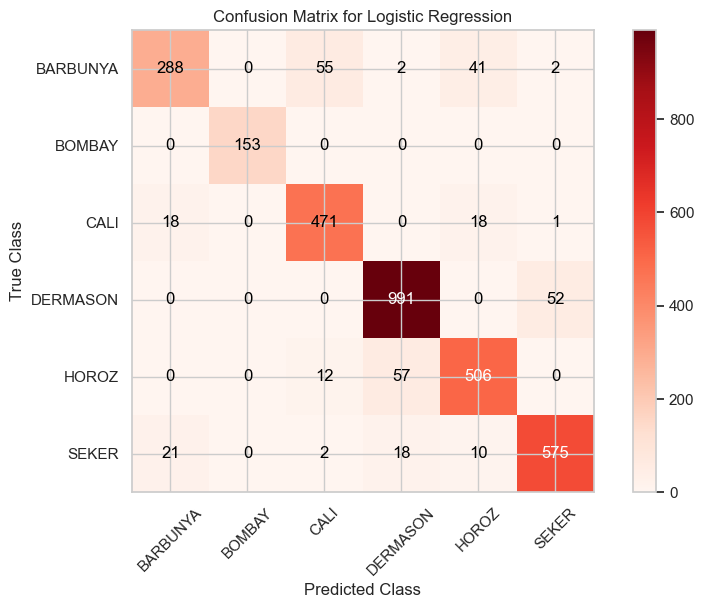

In [46]:
#Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix for Logistic Regression")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# DECISION TREE REGRESSION

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

In [48]:
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [49]:
# Convert the 'Class' column to numeric values
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

In [50]:
features = data.drop('Class', axis=1)
labels = data['Class']

In [51]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [52]:
# Create a Decision Tree Regression model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [53]:
# Generate predictions
y_pred = model.predict(X_test)

In [54]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 0.8599412340842312
R^2 Score: 0.7437934337810893


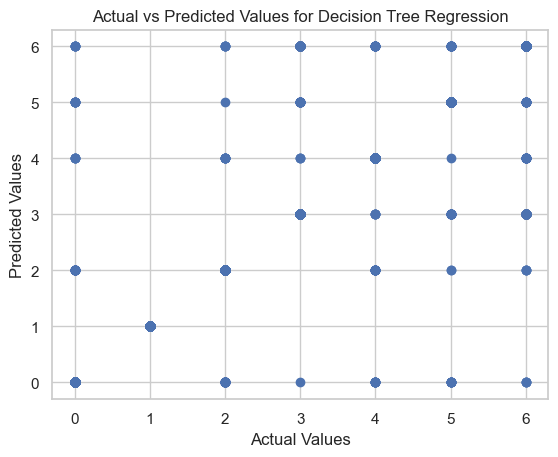

In [55]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regression')
plt.show()

# RIDGE REGRESSİON

In [56]:
from sklearn.linear_model import Ridge

In [57]:
# Create a Ridge Regression model
model = Ridge(alpha=1.0)

# Train the model
model.fit(X_train, y_train)

Ridge()

In [58]:
# Generate predictions
y_pred = model.predict(X_test)

In [59]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 1.9905689430480373
R^2 Score: 0.4069399006509439


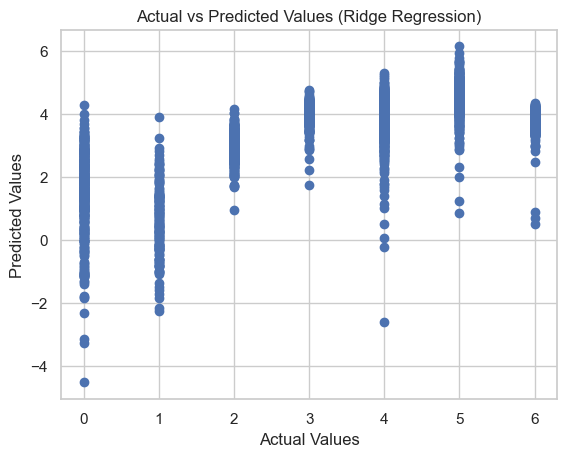

In [60]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.show()

In [61]:
#tablo oluşturmak için gerekli kütüphane
import pandas as pd

# Results of classification methods
results = {
    'Method': ['Decision Tree Regression','Ridge Regression'],
    'Mean Squared Error': [0.8584720861900098,1.9905689430480373],
    'R^2 Score': [0.7442311443156319,0.4069399006509439]
    
}
# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the results table
print(df_results)

                     Method  Mean Squared Error  R^2 Score
0  Decision Tree Regression            0.858472   0.744231
1          Ridge Regression            1.990569   0.406940


In [62]:
from tabulate import tabulate
# Convert DataFrame to tabular format
table = tabulate(df_results, headers='keys', tablefmt='fancy_grid')

# Display the tabular results
print(table)


╒════╤══════════════════════════╤══════════════════════╤═════════════╕
│    │ Method                   │   Mean Squared Error │   R^2 Score │
╞════╪══════════════════════════╪══════════════════════╪═════════════╡
│  0 │ Decision Tree Regression │             0.858472 │    0.744231 │
├────┼──────────────────────────┼──────────────────────┼─────────────┤
│  1 │ Ridge Regression         │             1.99057  │    0.40694  │
╘════╧══════════════════════════╧══════════════════════╧═════════════╛


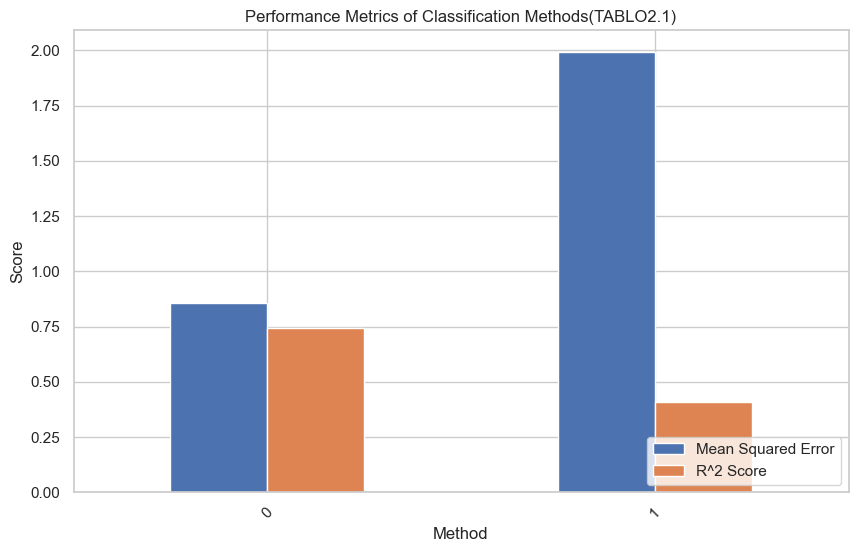

In [63]:
# Plot the results using a bar plot
sns.set(style='whitegrid')
df_results.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics of Classification Methods(TABLO2.1)')
plt.xlabel('Method')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()